In [ ]:
data_train = pd.read_csv('/fire_archive_M6_96619.csv', skipinitialspace=True)
data_train.head()

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier


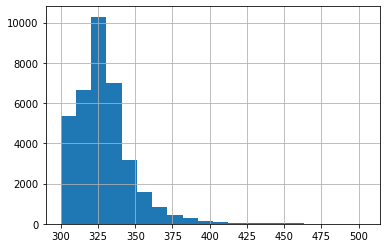

In [ ]:
data_train['brightness'].hist(bins=20)

In [ ]:
data_train['brightness'].quantile([0, 0.25, .75, .9])

0.00    300.0
0.25    316.5
0.75    336.7
0.90    351.0
Name: brightness, dtype: float64

In [ ]:
data_train['longitude'].quantile([0, 0.25, .75, .9])

0.00    114.10430
0.25    131.07225
0.75    147.47750
0.90    152.26610
Name: longitude, dtype: float64

In [ ]:
data_train['latitude'].quantile([0, 0.25, .75, .9])

0.00   -42.76280
0.25   -26.37025
0.75   -13.34360
0.90   -12.34470
Name: latitude, dtype: float64

In [ ]:
def bright_categorize(brightness):
     
    if brightness < 316.5:
        return 'low'
    elif 336.7 <= brightness <= 351.0:
        return 'High'
    else:
        return 'Extreme'

data_train['brightness'] = data_train['brightness'].fillna(data_train['brightness'].mean())
data_train['longitude'] = data_train['longitude'].fillna(data_train['longitude'].mean())
data_train['latitude'] = data_train['latitude'].fillna(data_train['latitude'].mean())
data_train['brightness_temperature'] = data_train['brightness'].apply(bright_categorize)

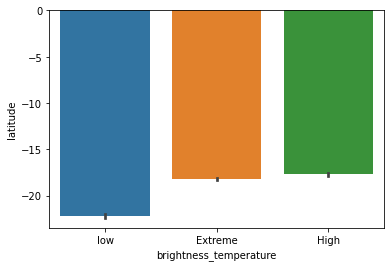

In [ ]:
sns.barplot(x='brightness_temperature', y='latitude', data=data_train)

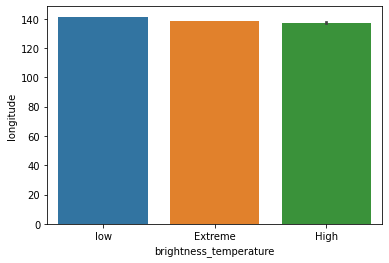

In [ ]:
sns.barplot(x='brightness_temperature', y='longitude', data=data_train)

In [ ]:
def area_categorize(longitude, latitude):
    
    if longitude < 122.8051765 or -30.000233 < latitude < -25.760321:
        return 'Western australia'
    elif 122.8051765 < longitude < 132.551000 or -20.917574 < latitude < 19.4914:
        return 'Northern territory'
    elif 132.551000 < longitude < 136.209152 or -31.840233 < latitude < -30.000233:
        return 'South Australia'
    elif 144.964600 < longitude < 145.612793 or -37.020100 < latitude < -31.840233:
        return 'New south wales'
    elif 142.702789 < longitude < 144.964600 or latitude < -37.020100:
        return 'Victoria'
    elif 136.209152 < longitude < 142.702789 or -25.760321 < latitude < -20.917574:
        return 'Queensland'
    else:
        return 'Unidentified'

df = pd.DataFrame(data_train)
df_train = pd.DataFrame(df, columns = ['brightness_temperature', 'daynight', 'brightness']) 
df_train['Area of Fire'] = df.apply(lambda x: area_categorize(x['longitude'], x['latitude']), axis=1)
df_train.head()

,brightness_temperature,daynight,brightness,Area of Fire
0,low,D,313.0,Northern territory
1,Extreme,D,319.3,Northern territory
2,low,D,311.6,Northern territory
3,low,D,310.1,Northern territory
4,low,D,310.3,Northern territory


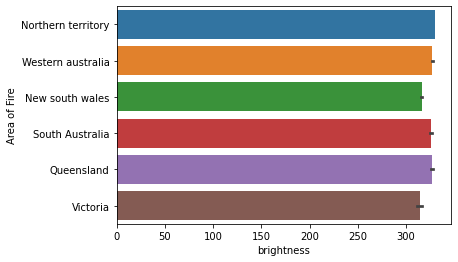

In [ ]:
sns.barplot(x='brightness', y='Area of Fire', data=df_train)

In [ ]:
import folium
m3 = folium.Map(location=[-38.043995, 145.264296], tiles='cartodbdark_matter', zoom_start=4)

for i in range(0,3000):
    df.loc[i, 'brightness']
    def color_producer(val):
        if val < 325 :
            return 'red'
        else:
            return 'orange'
for i in range(0,3000):
	folium.Circle(location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']], radius=120*df.iloc[i]['brightness'], color=color_producer(df.iloc[i]['brightness'])).add_to(m3)
m3

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


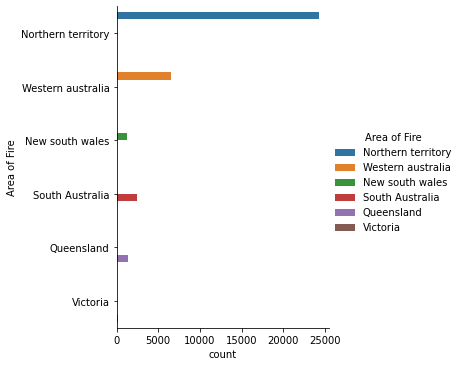

In [ ]:
sns.factorplot(y='Area of Fire', kind='count', hue='Area of Fire', data=df_train)

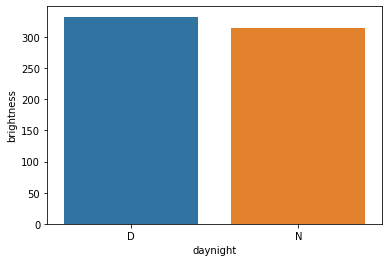

In [ ]:
sns.barplot(x='daynight', y='brightness', data=df_train)

In [ ]:
def preproccesing_data(df):
    df['brightness_temperature'] = df['brightness_temperature'].map({'low':0, 'High':1, 'Extreme':2})
    df['Area of Fire'] = df['Area of Fire'].map({'Western australia':0, 'Queensland':1, 'South Australia':2, 'New south wales':3, 'Northern territory':4, 'Victoria':5})
    df['daynight'] = df['daynight'].replace(['D'], 0)
    df['daynight'] = df['daynight'].replace(['N'], 1)
    return df_train


train_final = preproccesing_data(df_train)
train_final

,brightness_temperature,daynight,brightness,Area of Fire
0,0,0,313.0,4
1,2,0,319.3,4
2,0,0,311.6,4
3,0,0,310.1,4
4,0,0,310.3,4
...,...,...,...,...
36006,0,1,312.7,0
36007,0,1,304.9,0
36008,0,1,301.7,0
36009,0,1,303.6,0


In [ ]:
X_train = train_final.drop("Area of Fire", axis=1).fillna(0)
Y_train = train_final["Area of Fire"]
X_test  = test_final.copy()
X_train.shape, Y_train.shape, X_test.shape

NameError: ignored

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

61.17

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

67.4

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

70.48

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


67.4

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

67.4